In [85]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wine-quality-dataset/WineQT.csv


In [58]:
df = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


# Id column is of no use

In [59]:
df =df.drop(columns = ['Id'])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


# No null values 

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


# Analysis from Describe function:

1. fixed Acidity - max value is kind of anomaly
2. volatile acidity - max value off
3. citric acid - ok
4. residual sugar - max value is 6fold the mean
5. chlorides,density,pH,alcohol,quality - OK
6. free SO2 - 4fold max
7. total SO2 - 7fold max
8. sulphates - max value off

### Based on above data we can say data had some outliers lets verify our Assumption using visualization.

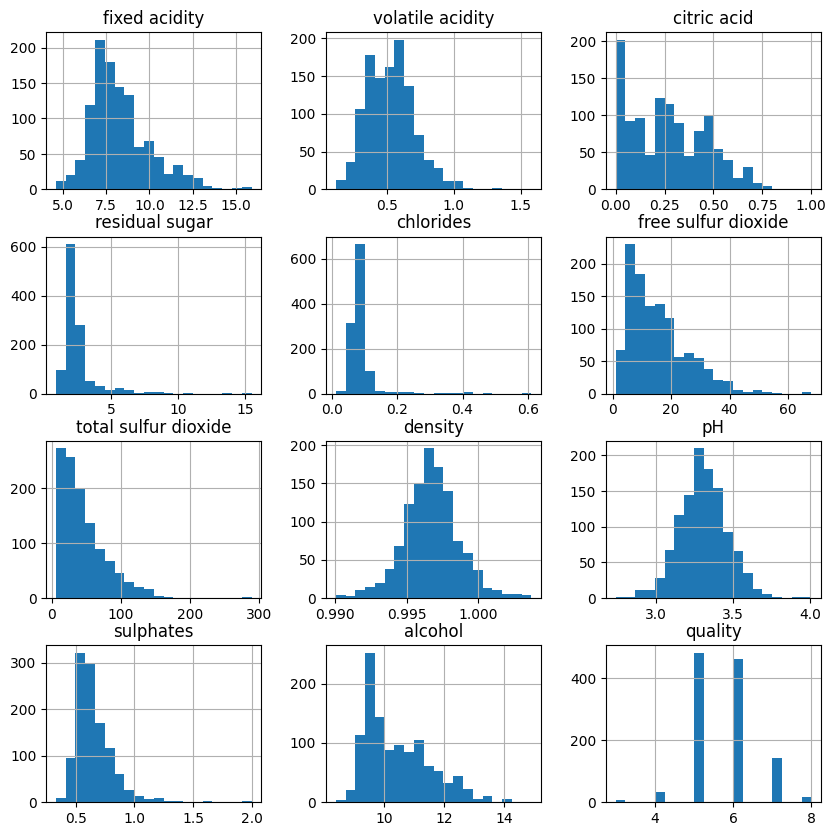

In [62]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

## We can see alcohol column is normally distributed. lets check more visulaization.

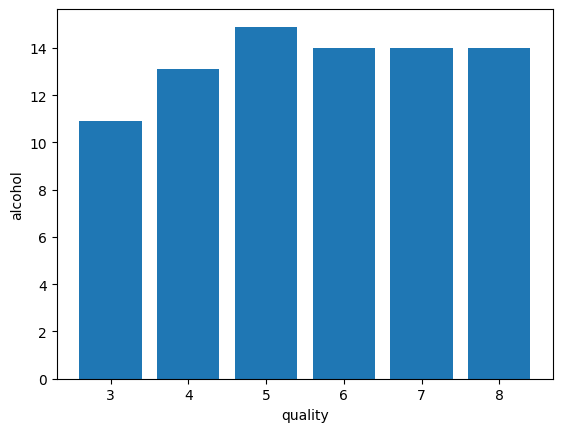

In [63]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

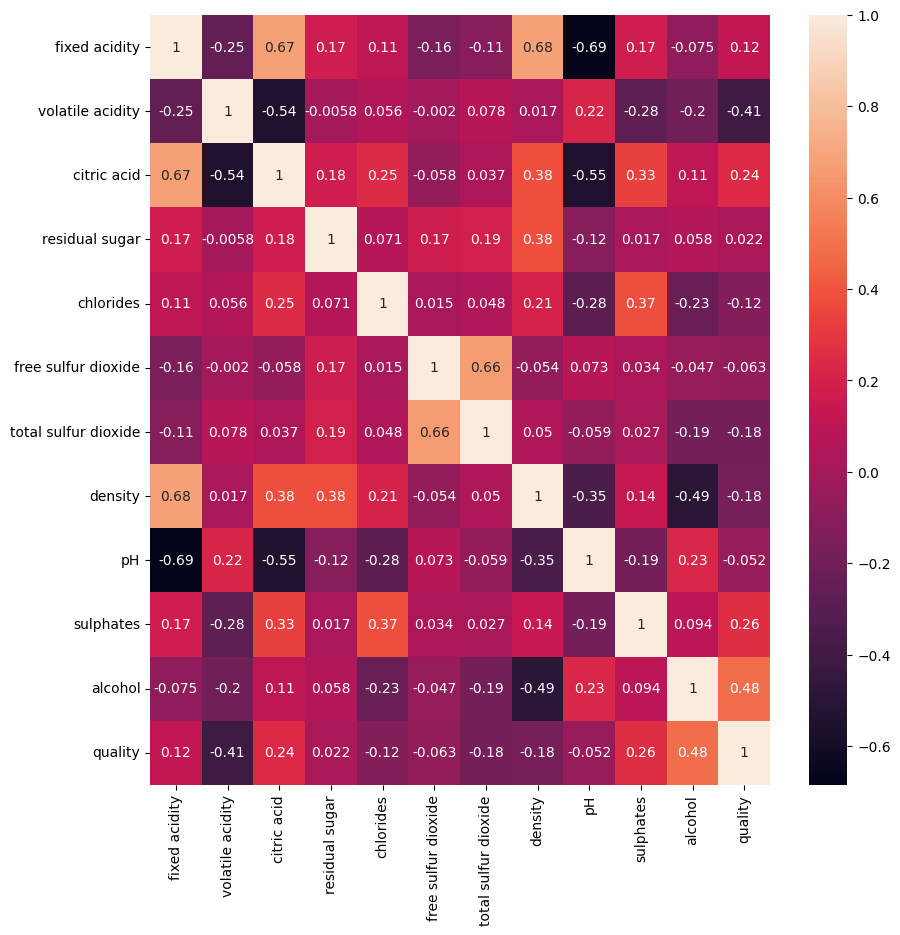

In [64]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() , annot=True, cbar=True)
plt.show()

## Correlated columns

1. fixed acidity + citric acid + density + pH(-ve)
2. Free SO2 + Total SO2 - clear correlation because compare other values to these column values in heatmap
3. quality is more related to alcohol and volatile acidity

In [65]:
df = df.drop(columns = ['total sulfur dioxide'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6


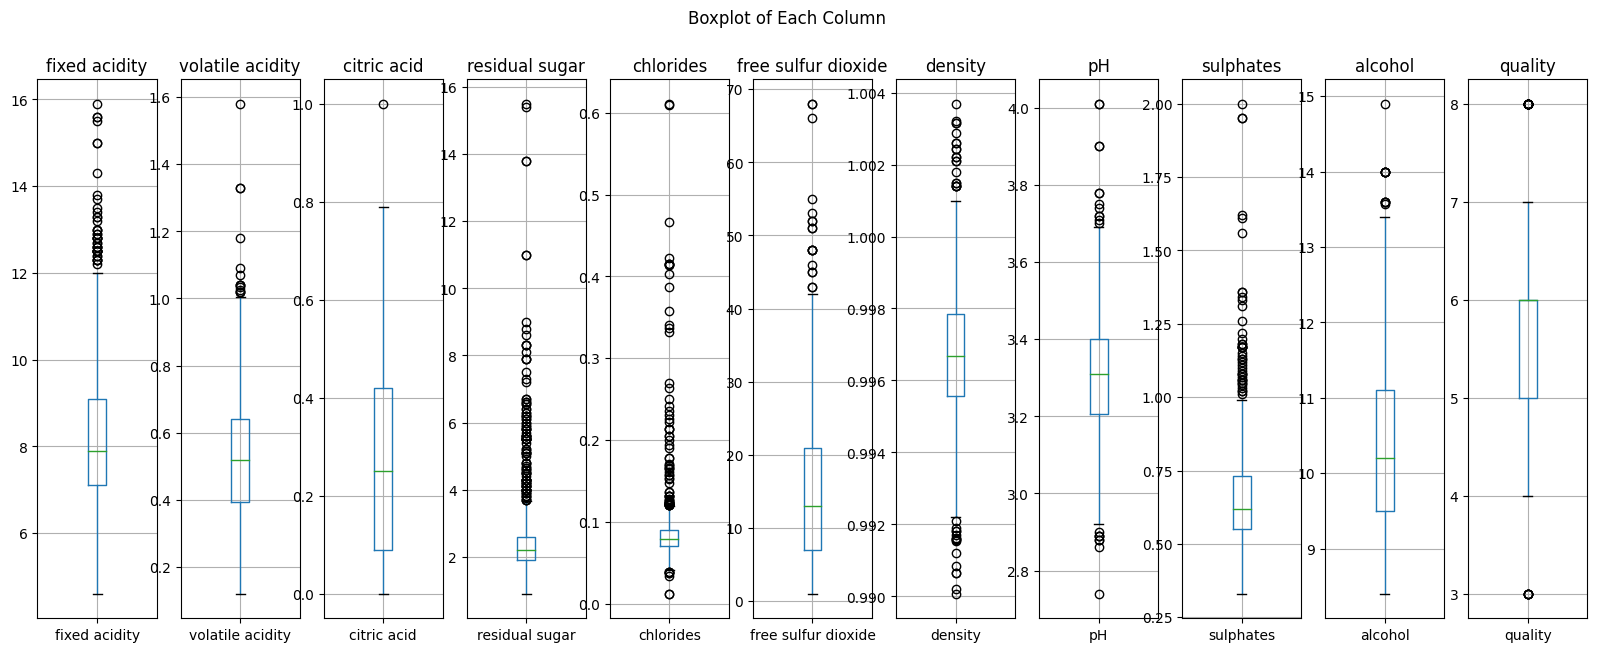

In [66]:
num_columns = len(df.columns)
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(20, 7))  # Adjust figsize as needed

for i, column in enumerate(df.columns):
    df.boxplot(column, ax=axes[i])
    axes[i].set_title(column)

plt.suptitle('Boxplot of Each Column')
plt.show()

In [67]:
outlier_counts = {}

for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    
    outlier_counts[column] = outlier_count

print("Count of outliers in each column:")
print(outlier_counts)

Count of outliers in each column:
{'fixed acidity': 44, 'volatile acidity': 14, 'citric acid': 1, 'residual sugar': 110, 'chlorides': 77, 'free sulfur dioxide': 18, 'density': 36, 'pH': 20, 'sulphates': 43, 'alcohol': 12, 'quality': 22}


## Outliers

1. residual sugar had so many outliers
2. fixed acidity, chlorides, sulphates had considerate off values
3. other columns are fine.

In [68]:
df.quality.value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [69]:
df_out = df[df.quality == 3]
df_out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
324,11.6,0.580,0.66,2.2,0.074,10.0,1.00080,3.25,0.57,9.00,3
368,10.4,0.610,0.49,2.1,0.200,5.0,0.99940,3.16,0.63,8.40,3
922,7.6,1.580,0.00,2.1,0.137,5.0,0.99476,3.50,0.40,10.90,3
1046,7.3,0.980,0.05,2.1,0.061,20.0,0.99705,3.31,0.55,9.70,3
1055,7.1,0.875,0.05,5.7,0.082,3.0,0.99808,3.40,0.52,10.20,3
1074,6.7,0.760,0.02,1.8,0.078,6.0,0.99600,3.55,0.63,9.95,3


## We can drop quality 3 records because it is like 0.5% of data so we help our program.

In [70]:
df = df[df.quality != 3]
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6


In [71]:
X= df.iloc[:,:-1]
y = df.iloc[:,-1]
unique_classes = np.unique(y)
print(unique_classes)

# Encode class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,test_size = 0.2,random_state = 12,shuffle =True)
for i in [X_train,X_test,y_train,y_test]:
    print(i.shape)

[4 5 6 7 8]
(909, 10)
(228, 10)
(909,)
(228,)


In [72]:
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

Accuracy: 0.5921
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.62      0.80      0.70        96
           2       0.57      0.55      0.56       101
           3       0.40      0.11      0.17        19
           4       0.00      0.00      0.00         6

    accuracy                           0.59       228
   macro avg       0.32      0.29      0.29       228
weighted avg       0.55      0.59      0.56       228



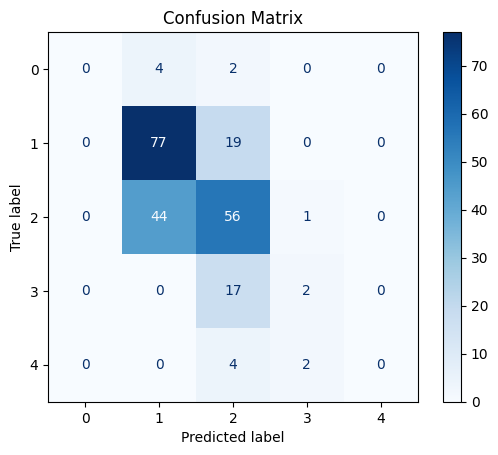

Accuracy: 0.6535
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.68      0.77      0.72        96
           2       0.67      0.61      0.64       101
           3       0.46      0.58      0.51        19
           4       0.67      0.33      0.44         6

    accuracy                           0.65       228
   macro avg       0.50      0.46      0.46       228
weighted avg       0.64      0.65      0.64       228



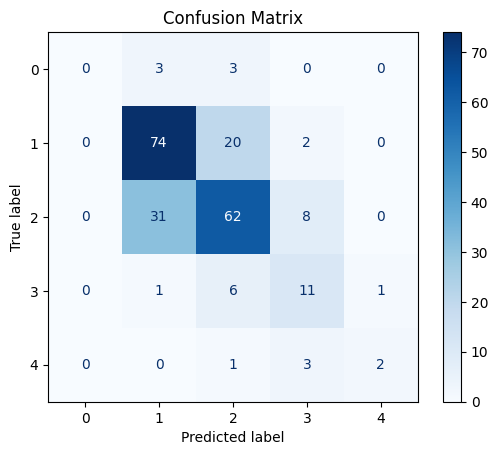

Accuracy: 0.6184
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.65      0.76      0.70        96
           2       0.62      0.59      0.61       101
           3       0.42      0.42      0.42        19
           4       0.00      0.00      0.00         6

    accuracy                           0.62       228
   macro avg       0.34      0.36      0.35       228
weighted avg       0.58      0.62      0.60       228



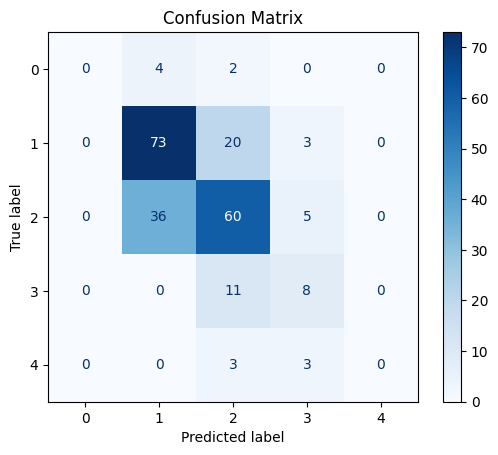

In [86]:
models = [LogisticRegression(multi_class='ovr'), XGBClassifier(n_classes=5), SVC(kernel='rbf')]
 
for i in range(3):
    models[i].fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = models[i].predict(X_test)

    # Evaluate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print(metrics.classification_report(y_test,models[i].predict(X_test)))
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=models[i].classes_)
    disp.plot(cmap=plt.cm.Blues, values_format=".0f")
    plt.title('Confusion Matrix')
    plt.show()